In [4]:
#金融量化分析常用到的有：pandas（数据结构）、
#numpy（数组）、matplotlib（可视化）、scipy（统计）
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import jieba
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

ts.set_token('4340a981b3102106757287c11833fc14e310c4bacf8275f067c9b82d')
pro = ts.pro_api()
df = pro.news(src='sina', start_date='20190601', end_date='20190624')
#获取当前即时财经新闻（如本文是2018年11月17日）
#默认是80条，可以通过参数“top= ”来设置
#保存数据到本地
#df.to_csv("D:/CuteHand/news.csv",encoding='gbk') 
#加encoding='gbk'才不会中文乱码，如果存在“非法字符”,可能也会报错

# 数据清洗，保留需要的字段
df=df[['datetime','title','content']]
# 保存数据
df.to_csv("latest_news.csv",encoding="utf_8_sig")
# 查看前5条数据
df.head()

,datetime,title,content
0,2019-06-23 23:55:20,,【第八届金交会闭幕，意向签约总额近3500亿元】6月21日至23日，为期三天的第八届中国（广...
1,2019-06-23 23:35:08,,【科创板发行接二连三！睿创微纳、天准科技将于7月2日网上申购】6月23日晚间，记者获悉，睿创...
2,2019-06-23 23:17:27,,【东盟峰会主席声明反对贸易保护主义】第34届东盟峰会23日在泰国首都曼谷闭幕。当天公布的本届...
3,2019-06-23 23:14:30,,加拿大皇家银行分析师Rai：尽管日本央行承诺在必要时采取行动，但第一季度GDP增长出现意外反...
4,2019-06-23 22:59:45,,【家乐福中国股权变动影响原有合作？国美：正在积极沟通】苏宁易购拟以48亿元收购家乐福中国80...


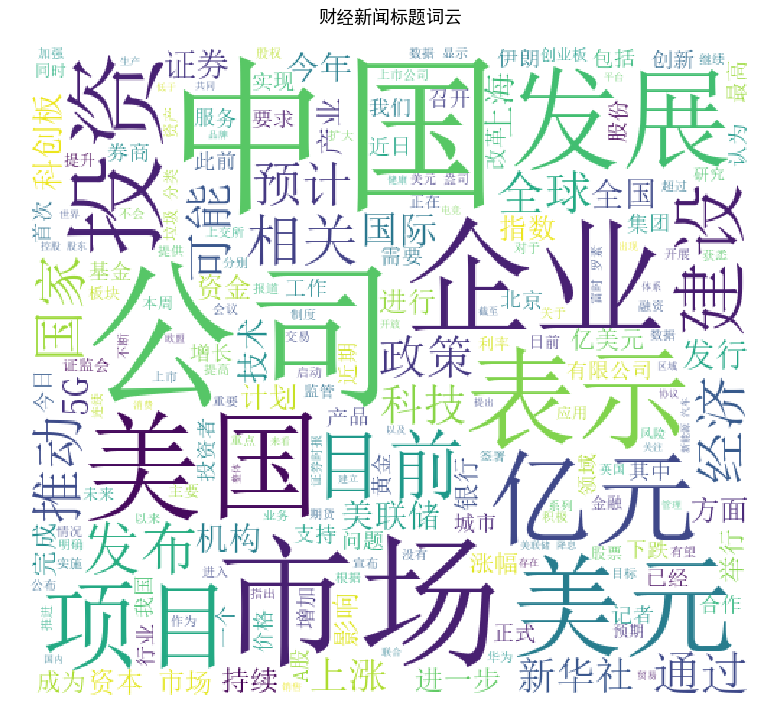

In [8]:
#提取新闻标题内容并转化为列表（list）
#注意原来是pandas的数据格式
mylist = list(df.content.values)

#对内容进行分词（即切割为一个个关键词）
word_list = [" ".join(jieba.cut(sentence)) for sentence in mylist]
new_text = ' '.join(word_list)

#读取图
img = plt.imread("black.jpg")

#设置词云格式
wc = WordCloud(background_color="white", 
     mask=img,#设置背景图片
     max_font_size=120, #字体最大值
     random_state=42,  #颜色随机性
     font_path="c:\windows\fonts\simsun.ttc")
#font_path显示中文字体，使用黑体

#生成词云
wc.generate(new_text)
image_colors = ImageColorGenerator(img)

#设置图片大小
plt.figure(figsize=(14,12))
plt.imshow(wc)
plt.title('财经新闻标题词云\n',fontsize=18)
plt.axis("off")
plt.show()

#将图片保存到本地
# wc.to_file("财经新闻标题词云.jpg")

【第八届金交会闭幕，意向签约总额近3500亿元】6月21日至23日，为期三天的第八届中国（广州）国际金融交易·博览会在广州举办。本届金交会上，广东新设机构平台9家，收集48个产融对接项目，意向签约总额近3500亿元，有7个粤港澳大湾区项目是首次集中交换签约文本。深圳证券交易所广州服务基地在本届金交会正式授牌成立，将更好地推动广东省企业上市、发行固定收益产品，支持区域内上市公司做优做强。（界面）


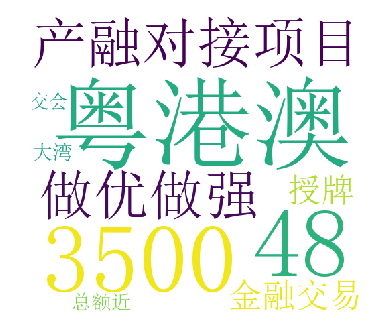

In [17]:
#数据清洗
#将titles列专门提取出来，并转化为列表形式
d=list(df.content[0])
content=''.join(d) 
print(content)
#设置分词黑名单
blacklist = ['个','文本','界面','21','23']

#将某些固定词汇加入分词
stopwords=['产融对接项目','国际金融交易·博览会']
for word in stopwords:
    jieba.add_word(word)

#设置blacklist黑名单过滤无关词语
d = {} #将词语转入字典
for word in jieba.cut(content): 
    if word in blacklist: 
        continue
    if len(word)<2: #去除单个字的词语
        continue
    d[word] = d.get(word, 0) + 1 

#使用jieba.analyse
d=''.join(d)
tags=jieba.analyse.extract_tags(d,topK=100,withWeight=True)
tf=dict((a[0],a[1]) for a in tags)
backgroud_Image = plt.imread('black.jpg')

wc = WordCloud(
    background_color='white',
    # 设置背景颜色
    mask=backgroud_Image,
    # 设置背景图片
    font_path="c:\windows\fonts\simsun.ttc",  
    # 若是有中文的话，这句代码必须添加
    max_words=10, # 设置最大现实的字数
    stopwords=STOPWORDS,# 设置停用词
    max_font_size=150,# 设置字体最大值
    random_state=30)
wc.generate_from_frequencies(tf)
plt.figure(figsize=(6,6),facecolor='w',edgecolor='k')
plt.imshow(wc)
# 是否显示x轴、y轴下标
plt.title(df.title[0],fontsize=15)
plt.axis('off')
plt.show()

In [25]:
from snownlp import SnowNLP

def word_processing(text):
    pass
#数据清洗，限于篇幅，代码省略

def sentiment_score_list(dataset):
    pass
#数据处理和情绪判断主函数，
#限于篇幅，代码省略

def sentiment_score(senti_text):
    s1 = SnowNLP(senti_text)
    print(senti_text)
    return s1.sentiments
#情绪得分汇总

#将上述新闻标题去掉空格，写入列表里（list）
y=[]
t1=list(df.content)
for i in range(len(t1)):
    x=t1[i].split()
    x=','.join(x)
    if i<len(t1)-1:
        x=x+'。'
    y.append(x)

In [28]:
# senti_score_list=sentiment_score_list(wlist)
for i in range(0,3):
    textscore =sentiment_score(df.content[i])
    print(textscore)

# p=0
# n=0
# for i in range(len(text)):
#     if text[i]>0:
#         p+=1
#     else:
#         n+=1
# print("正面新闻数目：{0},负面新闻数目：{1}".format(p,n))

【第八届金交会闭幕，意向签约总额近3500亿元】6月21日至23日，为期三天的第八届中国（广州）国际金融交易·博览会在广州举办。本届金交会上，广东新设机构平台9家，收集48个产融对接项目，意向签约总额近3500亿元，有7个粤港澳大湾区项目是首次集中交换签约文本。深圳证券交易所广州服务基地在本届金交会正式授牌成立，将更好地推动广东省企业上市、发行固定收益产品，支持区域内上市公司做优做强。（界面）
0.921750008323056
【科创板发行接二连三！睿创微纳、天准科技将于7月2日网上申购】6月23日晚间，记者获悉，睿创微纳和天准科技即将在上交所披露招股意向书、上市发行安排及初步询价公告等多个文件。公告显示，睿创微纳股票代码为688002，网上申购代码为787002。天准科技股票代码为688003，网上申购代码为787003。睿创微纳、天准科技网上、网下申购时间均为7月2日，将于7月4日公布中签结果。（证券时报）
0.33760371797103894
【东盟峰会主席声明反对贸易保护主义】第34届东盟峰会23日在泰国首都曼谷闭幕。当天公布的本届东盟峰会主席声明说，东盟反对贸易保护主义，支持维护多边贸易体制。（新华社）
0.05343571003642067
